In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%%bash

head -19 cyclic_punish_data/run-3-average.dat
head -19 cyclic_punish_data/run-3-dominant.dat
head -19 cyclic_punish_data/run-3-count.dat
head -33 cyclic_punish_data/run-3-instruction.dat
head -8 cyclic_punish_data/run-3-resource.dat
head -14 cyclic_punish_data/run-3-cur_reactions.dat

# Avida Average Data
# Fri Feb  3 12:55:35 2017
#  1: Update
#  2: Merit
#  3: Gestation Time
#  4: Fitness
#  5: Repro Rate?
#  6: Size
#  7: Copied Size
#  8: Executed Size
#  9: Abundance
# 10: Proportion of organisms that gave birth in this update
# 11: Proportion of Breed True Organisms
# 12: Genotype Depth
# 13: Generation
# 14: Neutral Metric
# 15: Lineage Label
# 16: True Replication Rate (based on births/update, time-averaged)

# Avida Dominant Data
# Wed Feb  1 16:44:16 2017
#  1: Update
#  2: Average Merit of the Dominant Genotype
#  3: Average Gestation Time of the Dominant Genotype
#  4: Average Fitness of the Dominant Genotype
#  5: Repro Rate?
#  6: Size of Dominant Genotype
#  7: Copied Size of Dominant Genotype
#  8: Executed Size of Dominant Genotype
#  9: Abundance of Dominant Genotype
# 10: Number of Births
# 11: Number of Dominant Breed True?
# 12: Dominant Gene Depth
# 13: Dominant Breed In
# 14: Max Fitness?
# 15: Genotype ID of Dominant Genotype
# 16: Name of th

In [32]:
def merge_reps(path, file, columns, col, skiprows=None):

    df_1 = pd.read_csv("%s/run-1-%s.dat" %(path, file),
                       delimiter=' ', skiprows=skiprows, header=None)

    df_1.columns = columns
    df_1 = df_1.dropna(axis=1)

    merge_reps = df_1[['update',col]].copy()
    merge_reps.columns = ["update",col+"_1"]

    for i in range(2,51):

        df = pd.read_csv("%s/run-%s-%s.dat" %(path, i, file),
                         delimiter=' ', skiprows=skiprows, header=None)

        df.columns = columns
        df = df.dropna(axis=1)

        merge_reps[col+'_%s' %i] = df[col]
        
    return merge_reps

In [33]:
columns = ['update','merit','gestation_time','fitness','repro_rate',
           '(deprecated)_size','copied_size','executed_size',
           '(deprecated)_abundance','proportion_of_organisms_that_gave_birth_in_this_update',
           'proportion_of_breed_true_organisms','(deprecated)_genotype_depth',
           'generation','neutral_metric','lineage_label',
           'true_replication_rate_(based_on_births/update_time-averaged)','']

fitness_ave = merge_reps(path='cyclic_zero_data', file='average',
                         columns=columns, col='fitness', skiprows=19)

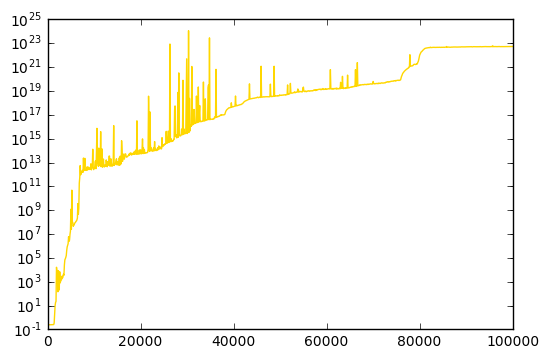

In [34]:
plt.plot(fitness_ave["update"],
         fitness_ave.iloc[:,1:].mean(axis=1),
         color='gold')

plt.yscale('log')

In [36]:
columns = ['update','not','nand','and','ornot','or','andnot','nor','xor','equals','']

dfs = ['reac_not', 'reac_nand', 'reac_and', 'reac_ornot', 'reac_or',
       'reac_andnot', 'reac_nor', 'reac_xor', 'reac_equals']

for reaction, df in zip(columns[1:-1], dfs):
    globals()[df] = merge_reps(path='cyclic_zero_data', file='cur_reactions',
                               columns=columns, col=reaction, skiprows=14)

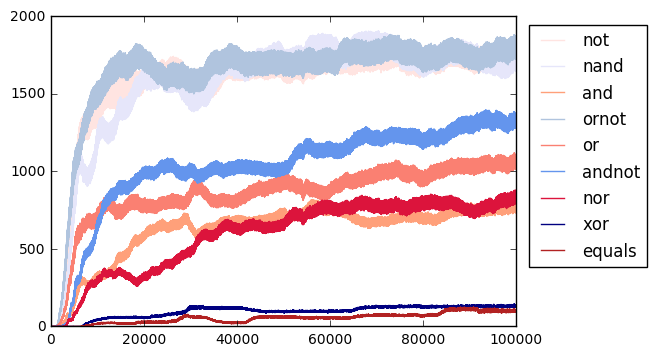

In [44]:
colors = ['mistyrose','lavender','lightsalmon','lightsteelblue','salmon',
          'cornflowerblue','crimson','navy','firebrick']

plt.plot(reac_not["update"],
         reac_not.iloc[:,1:].mean(axis=1),
         color=colors[0], label='not')

plt.plot(reac_nand["update"],
         reac_nand.iloc[:,1:].mean(axis=1),
         color=colors[1], label='nand')

plt.plot(reac_and["update"],
         reac_and.iloc[:,1:].mean(axis=1),
         color=colors[2], label='and')

plt.plot(reac_ornot["update"],
         reac_ornot.iloc[:,1:].mean(axis=1),
         color=colors[3], label='ornot')

plt.plot(reac_or["update"],
         reac_or.iloc[:,1:].mean(axis=1),
         color=colors[4], label='or')

plt.plot(reac_andnot["update"],
         reac_andnot.iloc[:,1:].mean(axis=1),
         color=colors[5], label='andnot')

plt.plot(reac_nor["update"],
         reac_nor.iloc[:,1:].mean(axis=1),
         color=colors[6], label='nor')

plt.plot(reac_xor["update"],
         reac_xor.iloc[:,1:].mean(axis=1),
         color=colors[7], label='xor')

plt.plot(reac_equals["update"],
         reac_equals.iloc[:,1:].mean(axis=1),
         color=colors[8], label='equals')

plt.legend(bbox_to_anchor=(1.3,1))

In [41]:
columns = ['update','day','night','']

df_res = pd.read_csv("cyclic_zero_data/run-1-resource.dat",
                     delimiter=' ', skiprows=8, header=None)
df_res.columns = columns
df_res = df_res.dropna(axis=1)

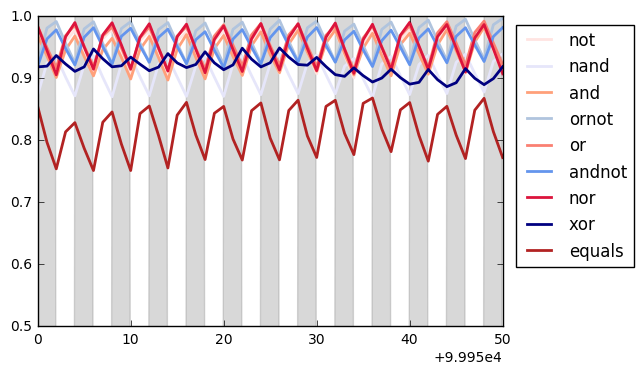

In [93]:
plt.plot(reac_not["update"],
         reac_not.iloc[:,1:].mean(axis=1)/reac_not.iloc[:,1:].mean(axis=1).max(),
         color=colors[0], lw=2, label='not')

plt.plot(reac_nand["update"],
         reac_nand.iloc[:,1:].mean(axis=1)/reac_nand.iloc[:,1:].mean(axis=1).max(),
         color=colors[1], lw=2, label='nand')

plt.plot(reac_and["update"],
         reac_and.iloc[:,1:].mean(axis=1)/reac_and.iloc[:,1:].mean(axis=1).max(),
         color=colors[2], lw=2, label='and')

plt.plot(reac_ornot["update"],
         reac_ornot.iloc[:,1:].mean(axis=1)/reac_ornot.iloc[:,1:].mean(axis=1).max(),
         color=colors[3], lw=2, label='ornot')

plt.plot(reac_or["update"],
         reac_or.iloc[:,1:].mean(axis=1)/reac_or.iloc[:,1:].mean(axis=1).max(),
         color=colors[4], lw=2, label='or')

plt.plot(reac_andnot["update"],
         reac_andnot.iloc[:,1:].mean(axis=1)/reac_andnot.iloc[:,1:].mean(axis=1).max(),
         color=colors[5], lw=2, label='andnot')

plt.plot(reac_nor["update"],
         reac_nor.iloc[:,1:].mean(axis=1)/reac_nor.iloc[:,1:].mean(axis=1).max(),
         color=colors[6], lw=2, label='nor')

plt.plot(reac_xor["update"],
         reac_xor.iloc[:,1:].mean(axis=1)/reac_xor.iloc[:,1:].mean(axis=1).max(),
         color=colors[7], lw=2, label='xor')

plt.plot(reac_equals["update"],
         reac_equals.iloc[:,1:].mean(axis=1)/reac_equals.iloc[:,1:].mean(axis=1).max(),
         color=colors[8], lw=2, label='equals')

night = list(np.append(np.zeros(20), np.ones(20)))*25000

plt.fill_between(np.arange(0,len(night)/10,0.1), 0, night, color='grey', alpha=0.3)
#plt.step(df_res['update'], df_res['night']/10, color='grey', label='night')

plt.xlim(99950,100000)
plt.ylim(0.5,1)

plt.legend(bbox_to_anchor=(1.3,1));